In [12]:
import qiskit
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels
from qiskit.aqua.utils import map_label_to_class_name

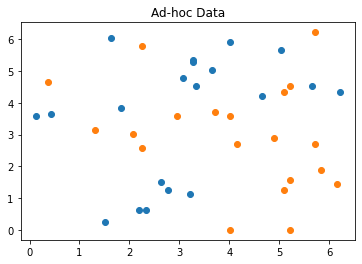

{'A': 0, 'B': 1}


In [13]:
feature_dim = 2
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10598
shots = 10000

sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size = training_dataset_size,
               test_size=testing_dataset_size,
               gap=0.3, 
               n=feature_dim,
               plot_data=True)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)


In [14]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm = QSVM(feature_map, training_input, test_input, None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, 
                                   shots=shots, 
                                   seed_simulator = random_seed, 
                                   seed_transpiler= random_seed)
result = svm.run(quantum_instance)

kernel matrix during the training:


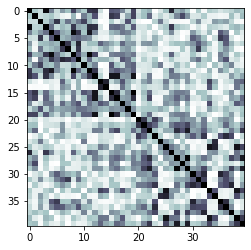

In [15]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix), 
                 interpolation='nearest', 
                 origin='upper',
                 cmap='bone_r')
plt.show()

In [16]:
predicted_labels = svm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth: {}".format(datapoints[1]))
print("predictions:  {}".format(predicted_labels))
print("testing success ratio: ", result['testing_accuracy'])

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
predictions:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
testing success ratio:  1.0
